In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
from functools import reduce

%config InlineBackend.figure_format = 'retina'

def iterate_map(f, x_0, n):
    # careful with n = 1; will iterate 0 times
    # maybe it should be range(1, n + 1)?
    trajectory = np.zeros(n)
    trajectory[0] = x_0
    for i in range(1, n):
        trajectory[i] = f(trajectory[i-1])
    
    return trajectory

def get_plot(f, x_start, x_end, x_step=0.01):
    f_vec = np.vectorize(f)
    x = np.arange(x_start, x_end, x_step)
    y = f_vec(x)
    return np.column_stack((x, y))

def get_cobweb(trajectory):
    coords = np.column_stack((np.repeat(trajectory[:-1], 2), 
                              np.repeat(trajectory[1:], 2)))
    coords[::2] = np.column_stack((trajectory[:-1], trajectory[:-1]))
    return coords

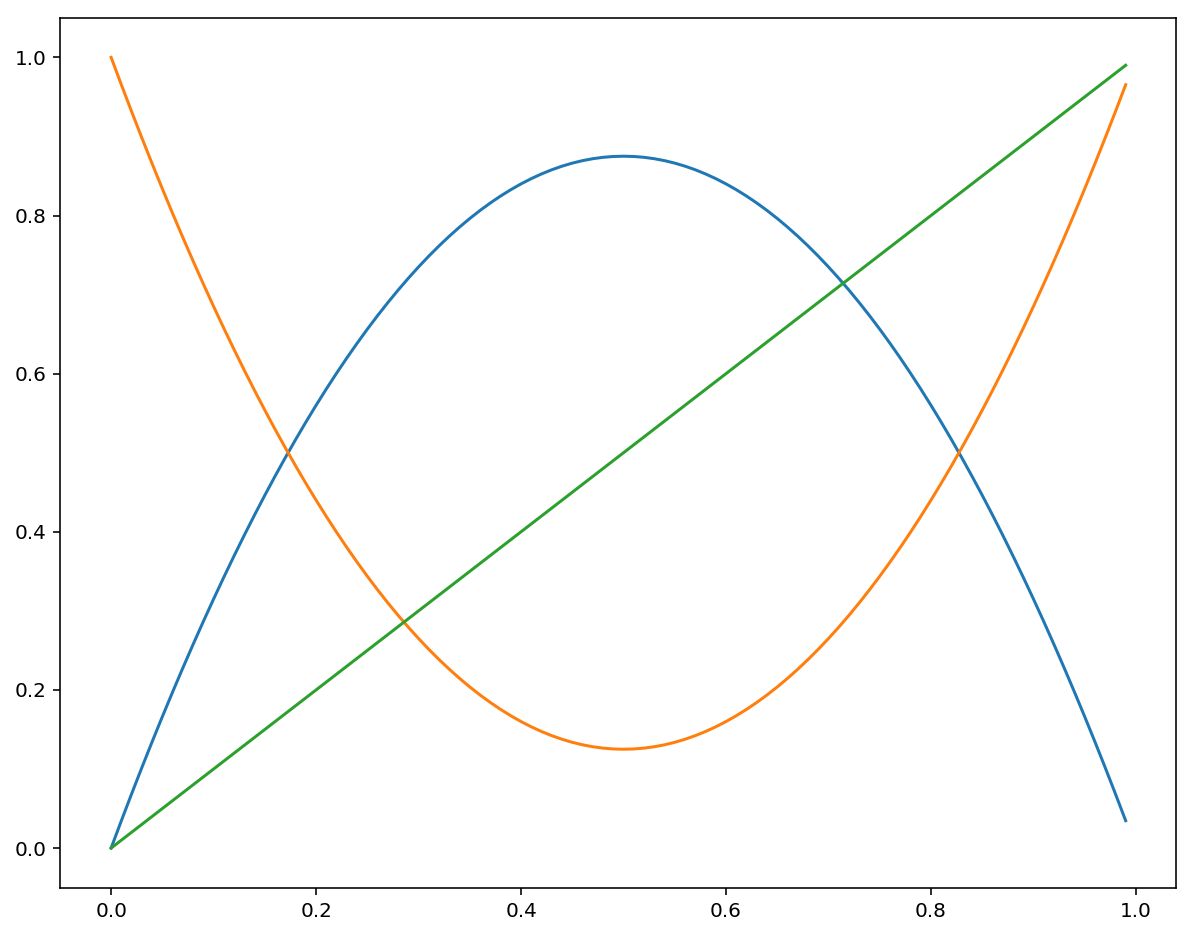

In [15]:
f = lambda x: 3.5 * x * (1 - x)
g = lambda x: 1 - f(x)
identity_fn = lambda x: x

f_plot = get_plot(f, 0, 1)
g_plot = get_plot(g, 0, 1)
line = get_plot(identity_fn, 0, 1)

fig, ax = plt.subplots(figsize=(10, 8))


ax.plot(f_plot[:,0], f_plot[:,1])
ax.plot(g_plot[:,0], g_plot[:,1])
ax.plot(line[:,0], line[:,1])
plt.show()

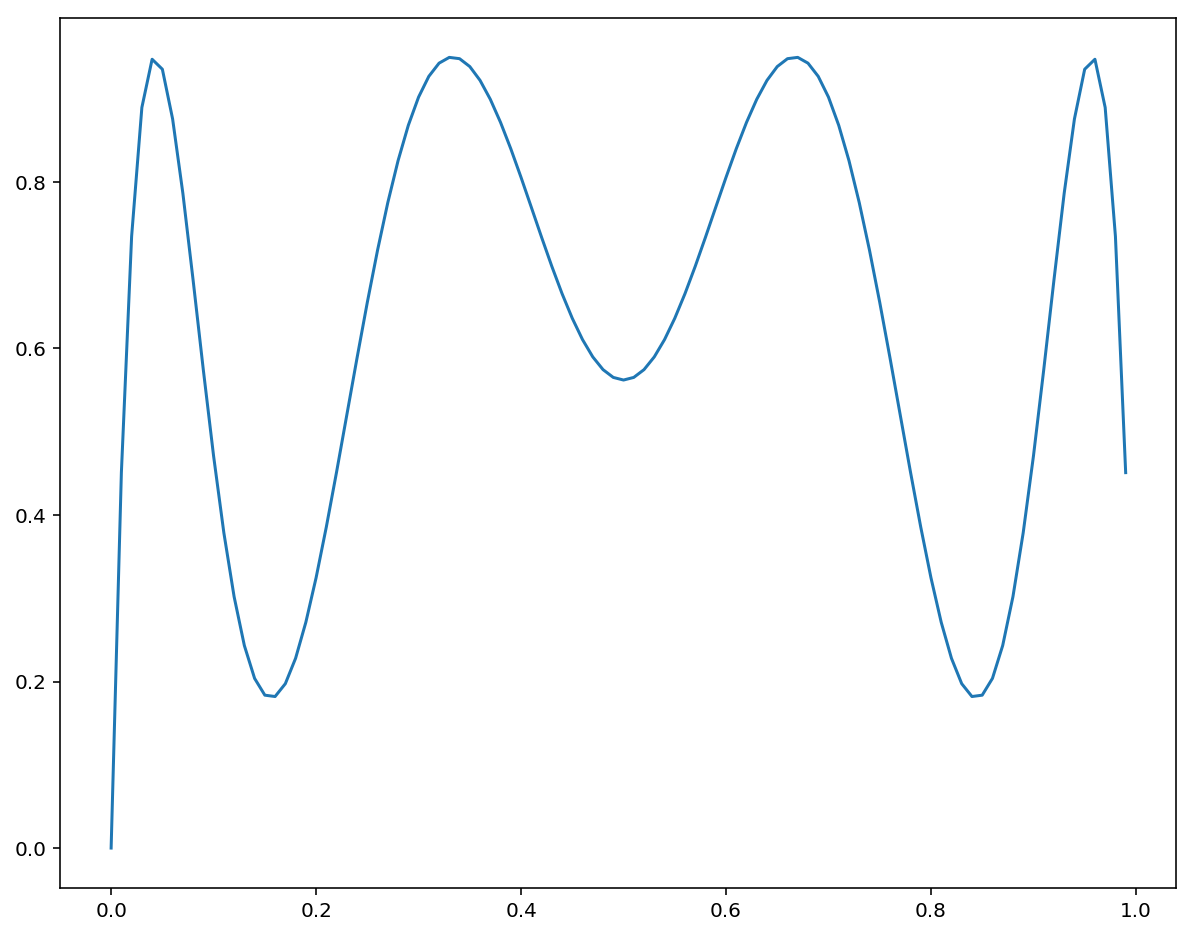

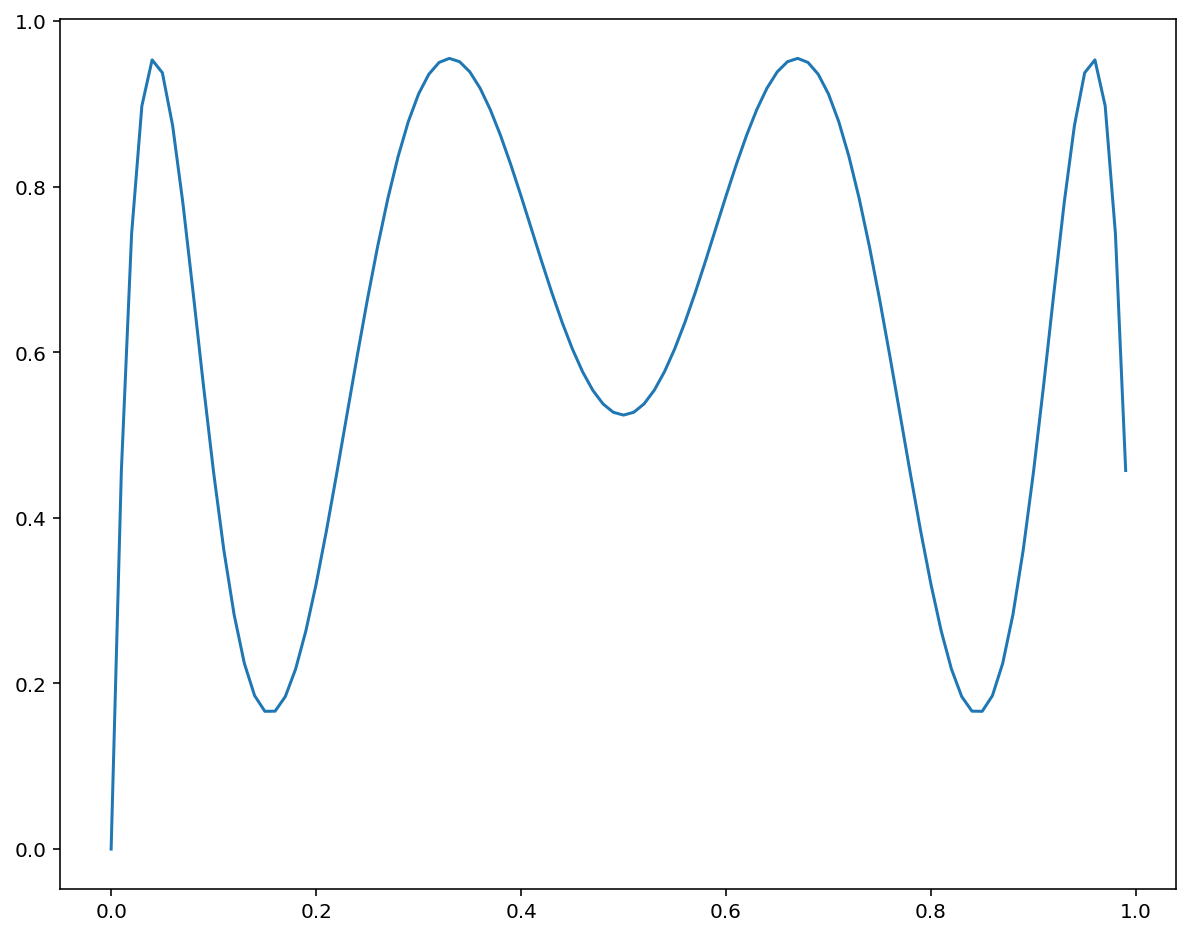

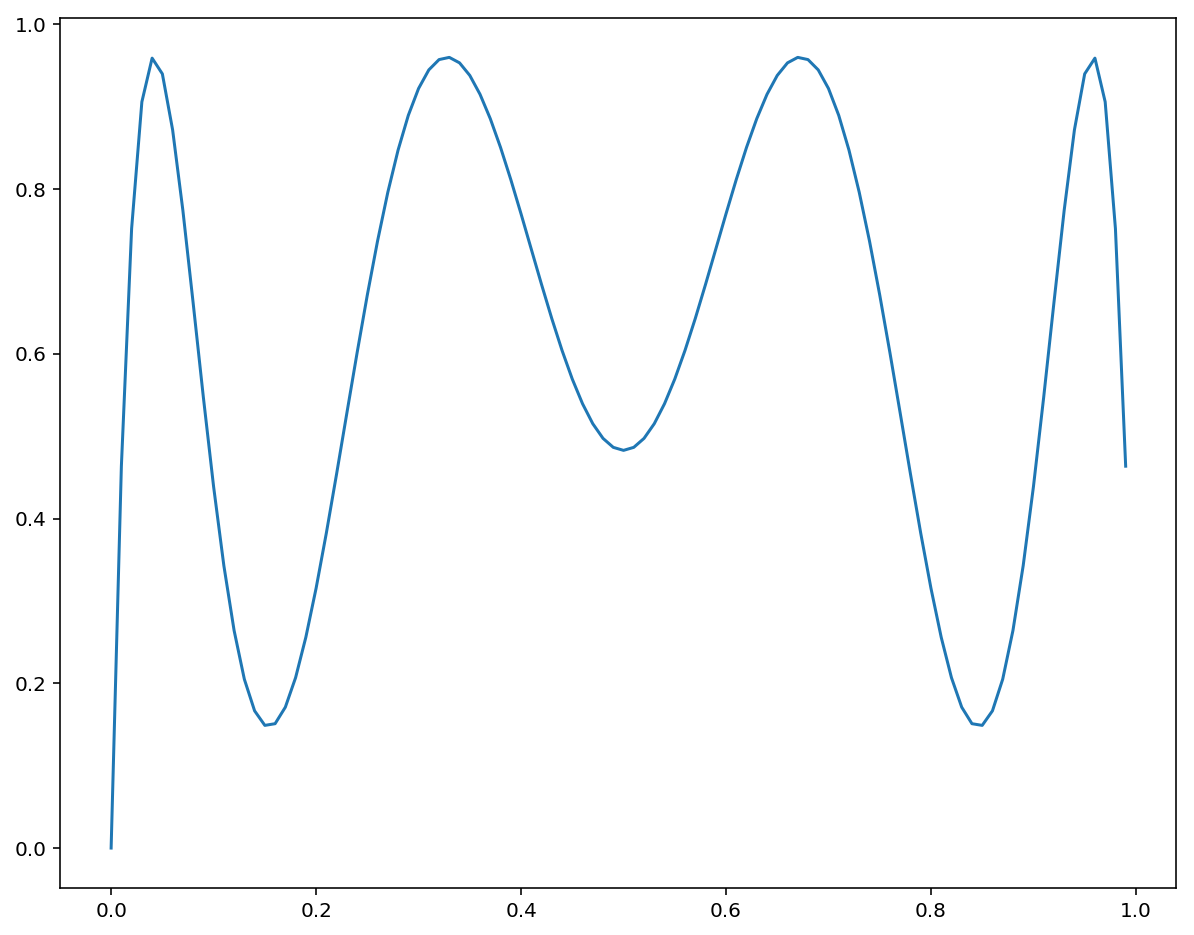

In [16]:
logistic_family = lambda a: lambda x: a*x*(1-x)
iterate_fn = lambda fn: lambda n: lambda x: \
                reduce(lambda x_i, fn_i: fn_i(x_i), [fn] * n, x)
logistic_3 = lambda a: iterate_fn(logistic_family(a))(3)

def plot_fn(fn, start=0, end=1, step=0.01):
    fig, ax = plt.subplots(figsize=(10, 8))
    fn_plot = get_plot(fn, start, end, step)
    ax.plot(fn_plot[:,0], fn_plot[:,1])
    plt.show()

plot_fn(logistic_3(3.8))
plot_fn(logistic_3(3.82))
plot_fn(logistic_3(3.84))